<h1 align="center"><font color="yellow">Pytorch: VISUALIZANDO MODELOS, DADOS E TREINAMENTO COM O TENSORBOARD</font></h1>

<font color="yellow">Data Scientist.: PhD.Eddy Giusepe Chirinos Isidro</font>

Link de estudo:

* [Pytorch Tutorial](https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html)

In [ ]:
%pip install torchvision

In [3]:
%load_ext watermark 
%watermark -v -p numpy,pandas,matplotlib,torchvision

Python implementation: CPython
Python version       : 3.9.13
IPython version      : 8.13.2

numpy      : 1.24.3
pandas     : 2.0.1
matplotlib : 3.7.1
torchvision: 0.15.2



In [5]:
# Importamos as Bibliotecas
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# datasets
trainset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=True,
    transform=transform)
testset = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=False,
    transform=transform)

# dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                        shuffle=True, num_workers=2)


testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)

# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Função auxiliar para mostrar uma imagem
# (used in the `plot_classes_preds` function below)
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        

In [28]:
# get some random training images
dataiter = iter(trainloader)

images, labels = next(dataiter)

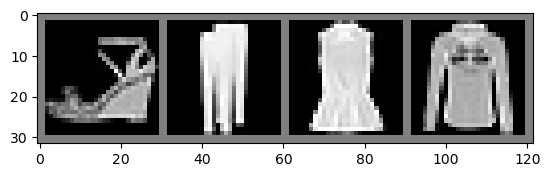

In [29]:
# shows as nossas Imagens
matplotlib_imshow(torchvision.utils.make_grid(images))

In [30]:
# print labels
batch_size = 4
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Sandal Trouser Shirt Pullover


Definiremos uma `arquitetura de modelo` semelhante a partir desse tutorial, fazendo apenas pequenas modificações para levar em conta o fato de que as imagens agora são `um canal` em vez de três e `28x28` em vez de `32x32`:

In [31]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


# 1. Configuração do TensorBoard

Agora vamos configurar o `TensorBoard`, importando `tensorboard` e `torch.utils` definindo um `SummaryWriter`, nosso objeto chave para gravar informações no TensorBoard.

In [35]:
from torch.utils.tensorboard import SummaryWriter

# Padrão `log_dir` is "runs" - seremos mais específicos aqui:
writer = SummaryWriter('runs/fashion_mnist_experiment_1')


Observe que esta linha sozinha cria uma pasta `runs/fashion_mnist_experiment_1`.

# 2. Escrevendo no TensorBoard

Agora vamos escrever uma imagem em nosso `TensorBoard` - especificamente, uma grade - usando [make_grid](https://pytorch.org/vision/stable/utils.html#torchvision.utils.make_grid).

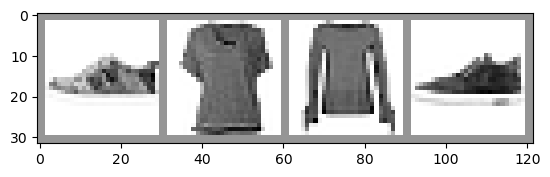

In [36]:
# Obtenha algumas imagens de treinamento aleatórias:
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Criamos Grade de Imagens
img_grid = torchvision.utils.make_grid(images)

# show images
matplotlib_imshow(img_grid, one_channel=True)

# write to tensorboard
writer.add_image('four_fashion_mnist_images', img_grid)

<font color="orange">Agora em execução:</font>

In [50]:
%load_ext tensorboard

%tensorboard --logdir /home/eddygiusepe/1_Eddy_Giusepe/LightningAI/Modelo_Dados_Treinamento_Tensorboard/runs

Você pode navegar também no link [http://localhost:6006](http://localhost:6006).

Agora você já sabe como usar o `TensorBoard`! Este exemplo, no entanto, poderia ser feito em um `Jupyter Notebook` - onde o `TensorBoard` realmente se destaca na criação de visualizações interativas. Abordaremos um deles a seguir e vários outros até o final do tutorial.

# 3. Inspecione o modelo usando o TensorBoard

<font color="orange">Um dos pontos fortes do `TensorBoard` é sua capacidade de visualizar estruturas de modelo complexas. Vamos visualizar o modelo que construímos.</font>

In [52]:
writer.add_graph(net, images)
writer.close()

Você pode abrir a URL acima e atualizar! Você observará `GRAPHS` 

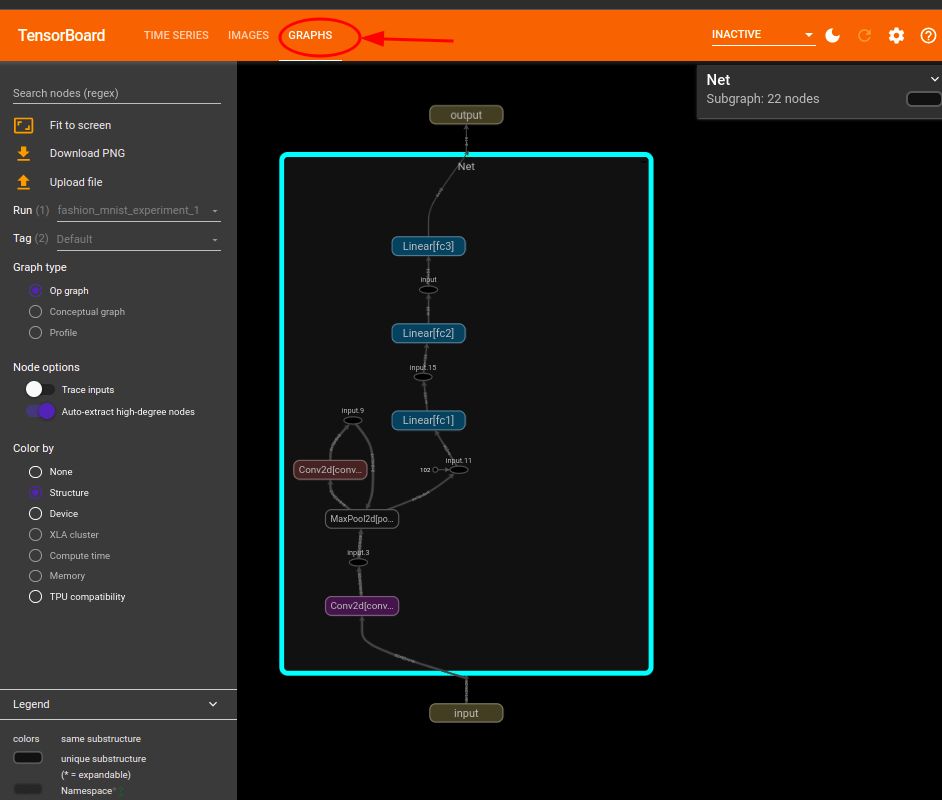

Vá em frente e clique duas vezes em `“Net”` para vê-lo expandido, tendo uma visão detalhada das operações individuais que compõem o modelo.

O `TensorBoard` possui um recurso muito útil para visualizar dados de alta dimensão, como dados de imagem em um espaço de dimensão inferior; abordaremos isso a seguir.

# 4. Adicionando um “Projetor” ao TensorBoard
